# Preprocessing Quality Control And R&D

In [18]:
import os
from satpy import Scene
from h5py import File
import numpy as np
from pyresample.geometry import create_area_def
import datetime
import cv2
import matplotlib.pyplot as plt

In [19]:
DATA_DIR = '../data'

In [20]:
orignal_radar_images = os.listdir(f"{DATA_DIR}/radar/")

In [21]:
test_original_radar_image = f"{DATA_DIR}/radar/{orignal_radar_images[100]}"

In [22]:
radarFile = File(test_original_radar_image)
len(orignal_radar_images)

275

In [23]:
copy_of_data = np.array(radarFile['reflectivity'])
copy_of_data[copy_of_data >= 255] = 0

In [24]:
np.max(radarFile['reflectivity'])

255

In [25]:
radarFile['reflectivity'].attrs.keys()

<KeysViewHDF5 ['calibration_flag', 'calibration_formulas', 'calibration_missing_data', 'calibration_out_of_image']>

In [26]:
radarFile['reflectivity'].attrs["calibration_flag"]

b'Y'

In [27]:
radarFile['reflectivity'].attrs["calibration_formulas"]

b'GEO = 0.500000 * PV + -32.000000'

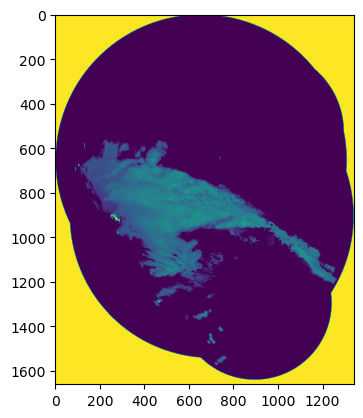

In [28]:
plt.imshow(radarFile['reflectivity'])

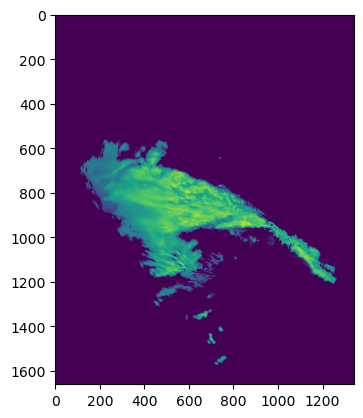

In [29]:
plt.imshow(copy_of_data)

In [30]:
copy_of_data = (copy_of_data * 0.5) - 32

In [31]:
copy_of_data[copy_of_data <= 0] = 0 # no rain
copy_of_data[(copy_of_data > 5) & ( copy_of_data <= 10)] = 1
copy_of_data[(copy_of_data > 10) & ( copy_of_data <= 15)] = 2
copy_of_data[(copy_of_data > 20 ) & (copy_of_data <= 25)] = 3
copy_of_data[(copy_of_data > 25 ) & (copy_of_data <= 30)] = 4
copy_of_data[(copy_of_data > 30) & (copy_of_data <= 35)] = 5
copy_of_data[(copy_of_data > 35 ) & (copy_of_data <= 40)] = 6
copy_of_data[(copy_of_data > 40 ) & (copy_of_data <= 45)] = 7
copy_of_data[(copy_of_data > 45 ) & (copy_of_data <= 50)] = 8
copy_of_data[(copy_of_data > 50 ) & (copy_of_data <= 55)] = 9
copy_of_data[(copy_of_data > 55 ) & (copy_of_data <= 60)] = 10
copy_of_data[(copy_of_data > 60 ) & (copy_of_data <= 65)] = 11
copy_of_data[copy_of_data > 65] = 12

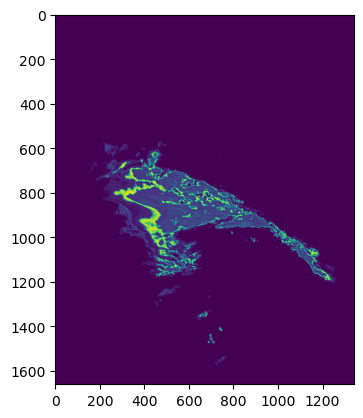

In [32]:
plt.imshow(copy_of_data)

In [33]:
np.max(copy_of_data)

20.0

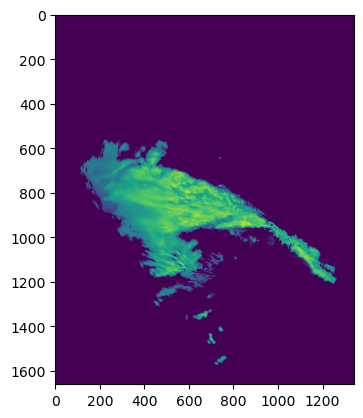

In [12]:
testss = f"{DATA_DIR}/radar/{orignal_radar_images[192]}"
radarFile = File(test_original_radar_image)
copy_of_data = np.array(radarFile['reflectivity'])
copy_of_data[copy_of_data >= 255] = 0
plt.imshow(copy_of_data)

## Evaluate Preprocessing of Satellite Images

In [34]:
satellite_files = [f"{DATA_DIR}/preprocessed/satellite/{x}" for x in os.listdir(f"{DATA_DIR}/preprocessed/satellite")]

In [35]:
satfile = np.load(satellite_files[50])

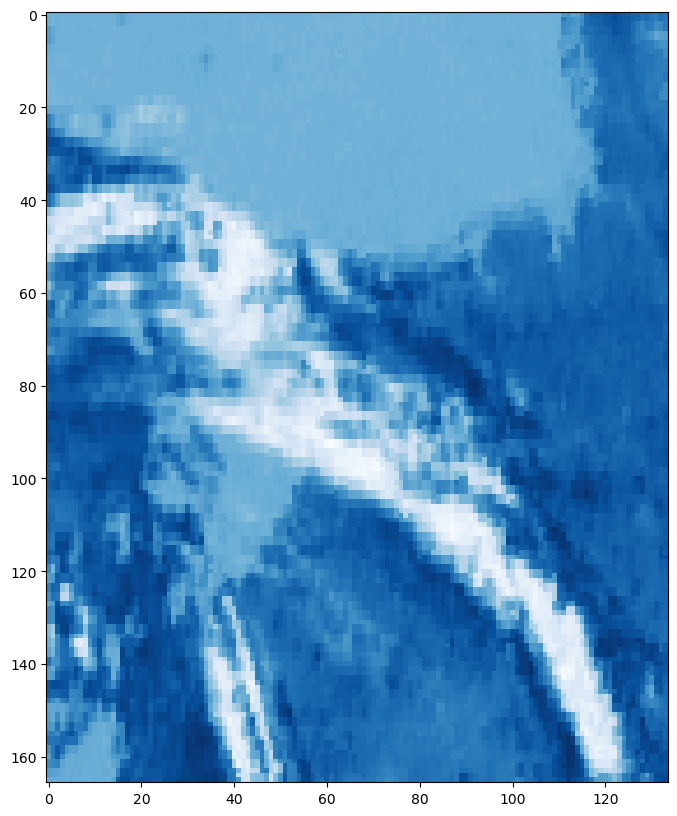

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(satfile[1], cmap="Blues")

In [36]:
satfile

array([[[  2.0634627,   4.248306 ,   7.4041905, ...,  21.96981  ,
          19.420828 ,  16.871845 ],
        [  2.1848435,   4.612447 ,   6.6759105, ...,  21.96981  ,
          20.998768 ,  18.328405 ],
        [  2.670364 ,   5.826249 ,   6.6759105, ...,  22.819473 ,
          23.54775  ,  22.09119  ],
        ...,
        [ 18.813929 ,  18.449787 ,  17.721508 , ...,  17.235985 ,
          18.328405 ,  19.542208 ],
        [ 19.784967 ,  18.085644 ,  16.871845 , ...,  16.629084 ,
          18.449787 ,  20.87739  ],
        [ 20.87739  ,  19.056684 ,  16.507702 , ...,  18.449787 ,
          17.600122 ,  19.90635  ]],

       [[276.1514   , 277.86508  , 281.7011   , ..., 291.31146  ,
         289.10867  , 288.0076   ],
        [275.47705  , 278.47867  , 280.97852  , ..., 290.03708  ,
         289.10867  , 287.58292  ],
        [277.0229   , 280.97852  , 281.7011   , ..., 291.1866   ,
         290.6816   , 289.775    ],
        ...,
        [252.58838  , 252.58838  , 254.96837  , ..., 2

In [20]:
np.max(satfile[0])

38.967506

In [21]:
np.min(satfile[0])

0.0

In [22]:
np.min(satfile)

0.0

In [23]:
np.max(satfile)

291.43576